## Imports

In [308]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

## Load Data

In [309]:
data_path = '/Users/yeji_kim/Desktop/project/roadkill_analysis/data/processed'

data = pd.read_csv(os.path.join(data_path, 'grid_features.csv')).drop(columns = ['geometry','wild_boar_grid', 'roe_deer_grid'])
data.head()

,grid_id,roadkill_count,national_highway_rk,white_rk,corridor_count,min_dist_to_corridor,is_hongcheon,wild_boar_count,roe_deer_count,white_road_grade,national_road_count,highway_road_count
0,grid_25,0,0,0,0,0.0,0,1.540276,0.0,1,1,0
1,grid_26,0,0,0,0,0.0,0,1.540276,0.0,0,0,0
2,grid_55,0,0,0,0,0.0,0,1.540276,0.0,1,0,0
3,grid_56,0,0,0,0,0.0,0,1.540276,0.0,1,0,0
4,grid_57,0,0,0,0,0.0,0,1.540276,0.0,2,3,0


## Data Columns
`grid_id` : Unique identifier for each grid cell in Gangwon Province.
(강원도 내 각 격자 셀의 고유 ID)

`national_highway_rk` : Roadkill count occurring on **national roads, provincial roads, and highways**.  
Highway cases are very rare, so they are aggregated together.  
(국도, 지방도, 고속도로에서 발생한 로드킬 수. 고속도로 건수는 매우 적어 함께 합산)

`white_rk` : Roadkill count occurring on **ordinary roads (non-national, non-provincial, non-highway)**.  
(일반도로에서 발생한 로드킬 수 — 국도·지방도·고속도로가 아닌 도로)

`corridor_count` : Number of ecological corridors within the grid.  
(각 격자 셀 내 생태통로 개수)

`min_dist_to_corridor` : Minimum distance (meters) from any roadkill incident in the grid  
to the nearest ecological corridor.  
(격자 내 로드킬 지점에서 가장 가까운 생태통로까지의 최소 거리, 미터 단위)

`wild_boar_grid` : Area-weighted average wild boar damage ratio per grid cell.  
                 (격자별 면적 가중 평균 멧돼지 피해율 — 폴리곤과 격자 교차 면적을 가중치로 사용)

`roe_deer_grid` : Area-weighted average roe deer damage ratio per grid cell.  
                (격자별 면적 가중 평균 고라니 피해율 — 폴리곤과 격자 교차 면적을 가중치로 사용)
                

`is_hongcheon` : Indicator (0/1) whether the grid lies within Hongcheon County.  
                (격자가 홍천군에 포함되는지 여부, 0/1)

`wild_boar_count` : Estimated distribution of wild boar incidents in each grid cell.  
Values are scaled from the area-weighted ratios (`wild_boar_grid`) using 16,700 total incidents  
reported in external studies as a reference.  
(격자별 멧돼지 출몰 추정 분포 — 면적 가중 비율(`wild_boar_grid`)을 기반으로,  
외부 연구에서 보고된 총 16,700건을 참고하여 환산한 값)

`roe_deer_count` : Estimated distribution of roe deer incidents in each grid cell.  
Values are scaled from the area-weighted ratios (`roe_deer_grid`) using external reports on  
total incidents as a reference.  
(격자별 고라니 출몰 추정 분포 — 면적 가중 비율(`roe_deer_grid`)을 기반으로,  외부 보고 자료의 총 발생 건수를 참고하여 환산한 값)

`white_road_grade` : Categorical index (0–4) describing the level of road presence and surrounding land use within each grid cell.  
Defined as follows:  

- **0** : No roads (pure forest)  
- **1** : Forest area with 1–2 roads  
- **2** : Small village / rural settlement  
- **3** : Town  
- **4** : City / urban area  

(격자 내 도로 존재 및 입지 환경을 나타내는 범주형 지표, 0–4 등급으로 분류)



`national_road_count` : Number of national and provincial roads contained in the grid.  
(격자 내 포함된 국도·지방도 개수)

`highway_road_count` : Number of highways contained in the grid.  
(격자 내 포함된 고속도로 개수)


Note: wild_boar_grid and roe_deer_grid were generated in preprocessing but are excluded from analysis/modeling, since their scaled versions (wild_boar_count, roe_deer_count) are used instead.


## 1. Exploratory Data Analysis (EDA)
First, check the structure of the dataset and look at the distribution of key variables. 

In [310]:
# Check dataset structure
print('Shape:', data.shape)   # (rows, columns)
print()
print('Column types and non-null counts:')
print(data.info())
print()
print('Missing values per column:')
print(data.isna().sum())

# Basic statistics for numeric columns
data.describe()


Shape: (784, 12)

Column types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   grid_id               784 non-null    object 
 1   roadkill_count        784 non-null    int64  
 2   national_highway_rk   784 non-null    int64  
 3   white_rk              784 non-null    int64  
 4   corridor_count        784 non-null    int64  
 5   min_dist_to_corridor  784 non-null    float64
 6   is_hongcheon          784 non-null    int64  
 7   wild_boar_count       784 non-null    float64
 8   roe_deer_count        784 non-null    float64
 9   white_road_grade      784 non-null    int64  
 10  national_road_count   784 non-null    int64  
 11  highway_road_count    784 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 73.6+ KB
None

Missing values per column:
grid_id                 0
roadkil

,roadkill_count,national_highway_rk,white_rk,corridor_count,min_dist_to_corridor,is_hongcheon,wild_boar_count,roe_deer_count,white_road_grade,national_road_count,highway_road_count
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.543367,0.239796,0.303571,0.095663,1918.035651,0.139031,21.301020,148.516582,1.654337,0.994898,0.151786
std,1.526490,0.929795,1.094366,0.410316,4644.061070,0.346199,34.661158,159.870982,0.861646,0.853196,0.386452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.154339,19.969979,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.658757,114.184570,2.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.966643,238.765179,2.000000,2.000000,0.000000
max,14.000000,13.000000,13.000000,5.000000,30899.688870,1.000000,161.590032,595.923186,4.000000,4.000000,3.000000


We can see that there is no missing values. 

### Roadkill Count Distribution

The raw target variable `roadkill_count` is heavily zero-inflated,  
with most grid cells having no incidents.


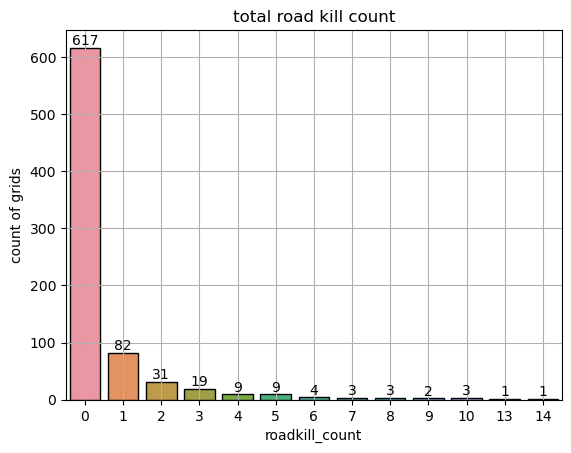

In [311]:
ax = sns.countplot(data= data, x = 'roadkill_count',edgecolor = 'black')

for con in ax.containers:
    ax.bar_label(con)

plt.grid()
plt.title('total road kill count')
plt.xlabel('roadkill_count')
plt.ylabel('count of grids')
plt.show()

### Categorization of Roadkill Count

To handle the skewed distribution, we create a categorical target `roadkill_level`:

- 0 = no incidents (`roadkill_count = 0`)  
- 1 = low incidents (`roadkill_count = 1–3`)  
- 2 = high incidents (`roadkill_count ≥ 4`)


In [312]:
def categorize_rk(x):
    if x == 0:
        return 0
    elif 1 <= x <= 3:
        return 1
    else:
        return 2

data['roadkill_level'] = data['roadkill_count'].apply(categorize_rk)

print(data['roadkill_level'].value_counts().sort_index())


roadkill_level
0    617
1    132
2     35
Name: count, dtype: int64


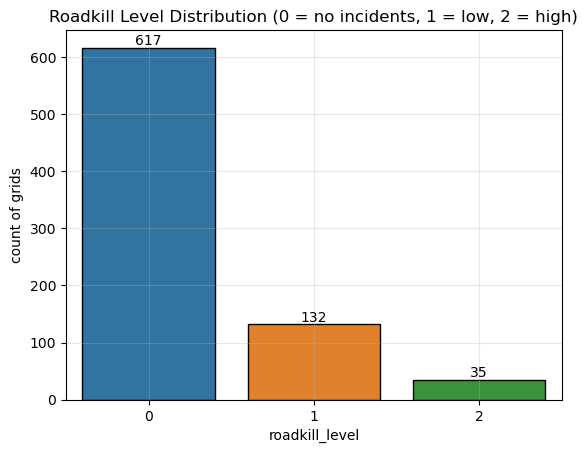

In [313]:
# Visualize the distribution of the new categorical target
ax = sns.countplot(data=data, x='roadkill_level', edgecolor='black')

for con in ax.containers:
    ax.bar_label(con)

plt.grid(alpha=0.3)
plt.title('Roadkill Level Distribution (0 = no incidents, 1 = low, 2 = high)')
plt.xlabel('roadkill_level')
plt.ylabel('count of grids')
plt.show()


After categorization, the distribution is less skewed:  
- 0 (no incidents): 617 grids  
- 1 (low, 1–3 incidents): 132 grids  
- 2 (high, ≥4 incidents): 35 grids  

This transformation reduces the zero-inflation problem and makes the target more suitable
for classification models.


### Distribution of Categorical Variables


#### Distribution of  `is_hongcheon`
We check how many grids belong to Hongcheon vs. the rest of Gangwon.

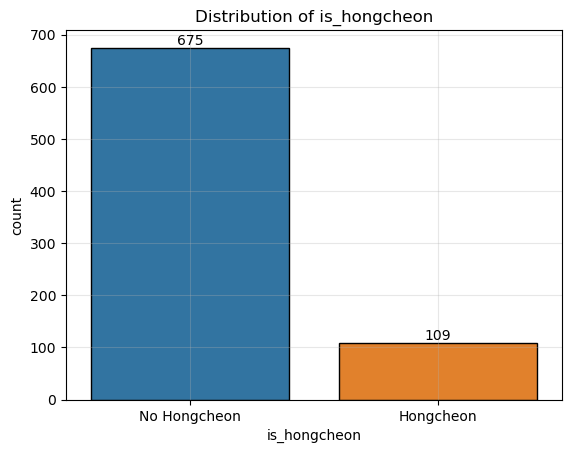

In [314]:
# is_hongcheon
ax = sns.countplot(data=data, x='is_hongcheon', edgecolor='black')

for con in ax.containers:
    ax.bar_label(con)

ax.set_xticklabels(['No Hongcheon', 'Hongcheon'])
plt.title('Distribution of is_hongcheon')
plt.grid(alpha=0.3)
plt.show()



Most grids are outside Hongcheon (train), while a smaller portion is in Hongcheon (test).


#### Distribution of White Road Grade
We examine `white_road_grade`, which classifies grids from **0 (pure forest)** to **4 (urban area)**.

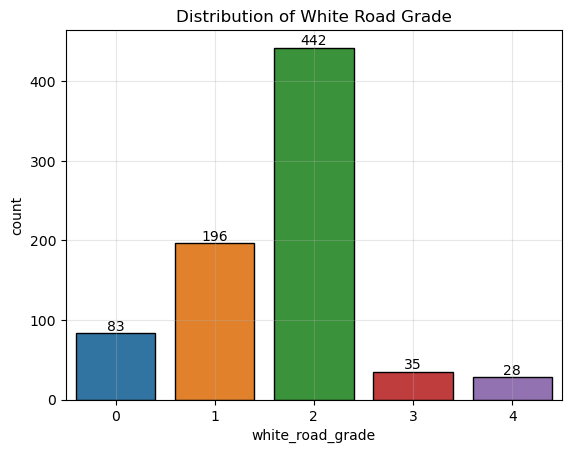

In [315]:
# white_road_grade
ax = sns.countplot(data=data, x='white_road_grade', edgecolor='black')
for con in ax.containers:
    ax.bar_label(con)
plt.title('Distribution of White Road Grade')
plt.grid(alpha=0.3)
plt.show()

Most grids are **grade 2 (small villages / rural)**,  
followed by **grade 1 (forest + few roads)**.  
Very few are **urban (3–4)** or **pure forest (0)**.


### Distribution of Numerical Variables

#### Corridor Count

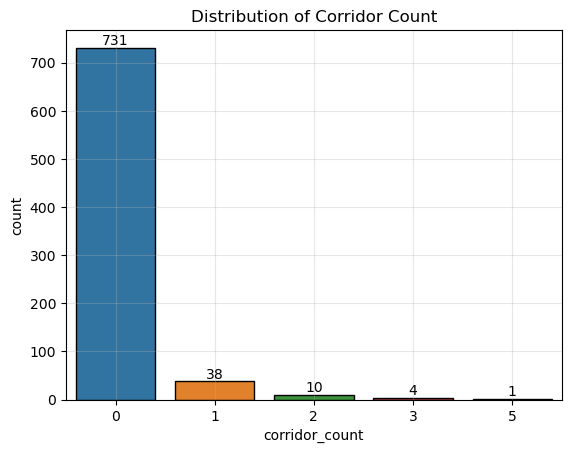

In [316]:
# corridor_count
ax = sns.countplot(data=data, x='corridor_count', edgecolor='black')

for con in ax.containers:
    ax.bar_label(con)
    
plt.title('Distribution of Corridor Count')
plt.grid(alpha=0.3)
plt.show()



Most grids have no ecological corridors.  
A smaller number contain 1–3 corridors, and very few exceed that.

#### Minimum Distance to Corridor

We visualize `min_dist_to_corridor` only for grids with roadkill (`roadkill_count > 0`),  
since the distance is not meaningful when there are no incidents.  



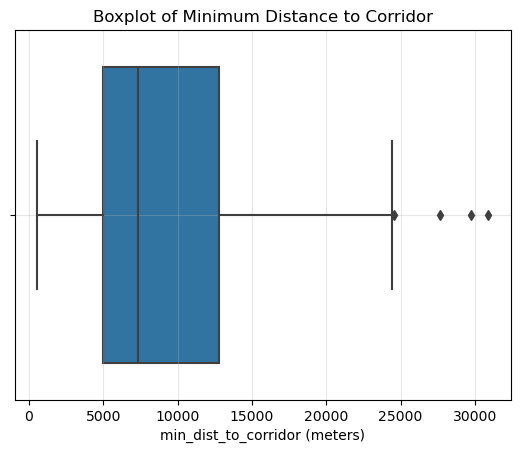

In [317]:
# Boxplot (exclude grids with roadkill_count = 0)
sns.boxplot(data=data[data['min_dist_to_corridor'] != 0], x='min_dist_to_corridor')
plt.title('Boxplot of Minimum Distance to Corridor')
plt.xlabel('min_dist_to_corridor (meters)')
plt.grid(alpha=0.3)
plt.show()


The boxplot shows a strong right skew:  
- Most roadkill incidents occur within **5–15 km** of the nearest corridor.  
- A few outliers exceed **25–30 km**, indicating grids where incidents occur far away from ecological corridors.  

For modeling, we will retain all values (including zeros) since the absence of incidents itself is informative.


#### Distribution of Wildlife-related Variables


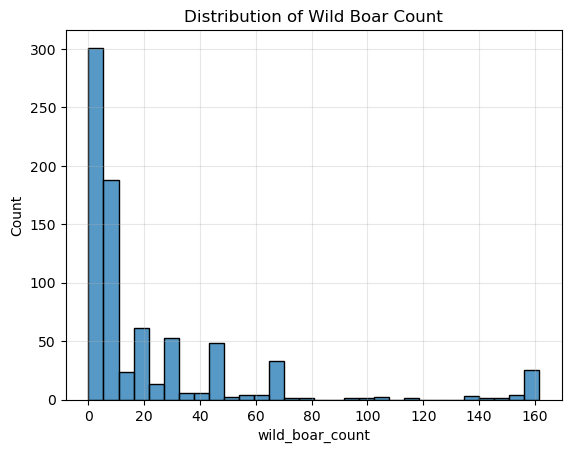

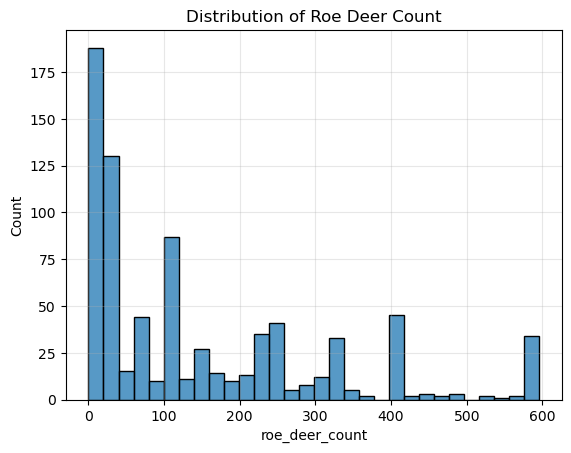

In [318]:
# wild_boar_count
sns.histplot(data=data, x='wild_boar_count', bins=30, edgecolor='black')
plt.title('Distribution of Wild Boar Count')
plt.grid(alpha=0.3)
plt.show()

# roe_deer_count
sns.histplot(data=data, x='roe_deer_count', bins=30, edgecolor='black')
plt.title('Distribution of Roe Deer Count')
plt.grid(alpha=0.3)
plt.show()


`wild_boar_count` is highly right-skewed.  
Most grids have low estimated presence (below 20),  
but a few grids show very high values (above 100).

`roe_deer_count` also shows a right-skewed pattern,  
with many grids concentrated at low values (<50)  
but some extreme outliers reaching above 500.

#### Distribution of Road-related Variables


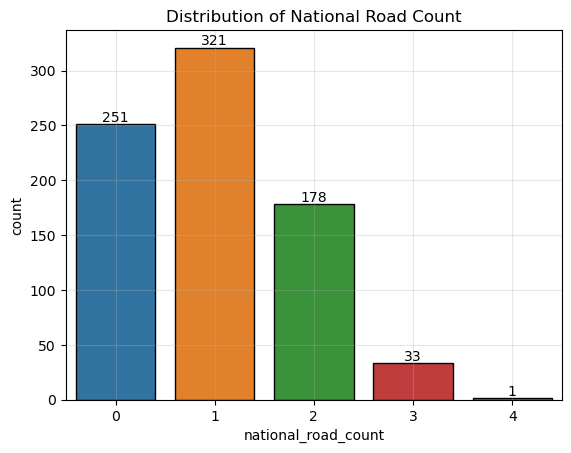

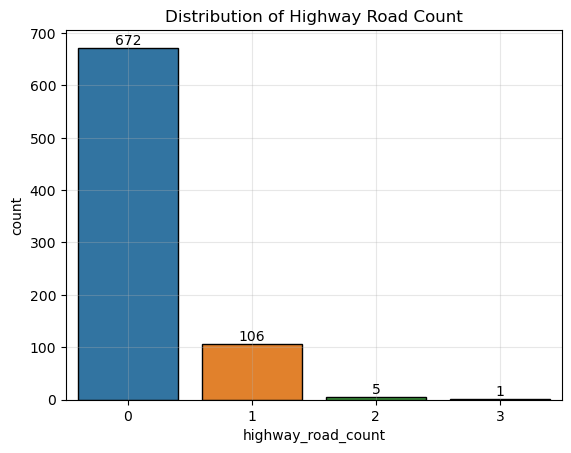

In [319]:
# national_road_count
ax = sns.countplot(data=data, x='national_road_count', edgecolor='black')
for con in ax.containers:
    ax.bar_label(con)
plt.title('Distribution of National Road Count')
plt.grid(alpha=0.3)
plt.show()

# highway_road_count
ax = sns.countplot(data=data, x='highway_road_count', edgecolor='black')
for con in ax.containers:
    ax.bar_label(con)
plt.title('Distribution of Highway Road Count')
plt.grid(alpha=0.3)
plt.show()


`national_road_count` is mostly **0–2**,  
indicating that most grids contain few or no national roads.  
Only a handful of grids have 3 or more.  

`highway_road_count` is even more concentrated at **0**,  
with only a small number of grids containing 1–2 highways.

### Relationship between Road Types and Roadkill Level 

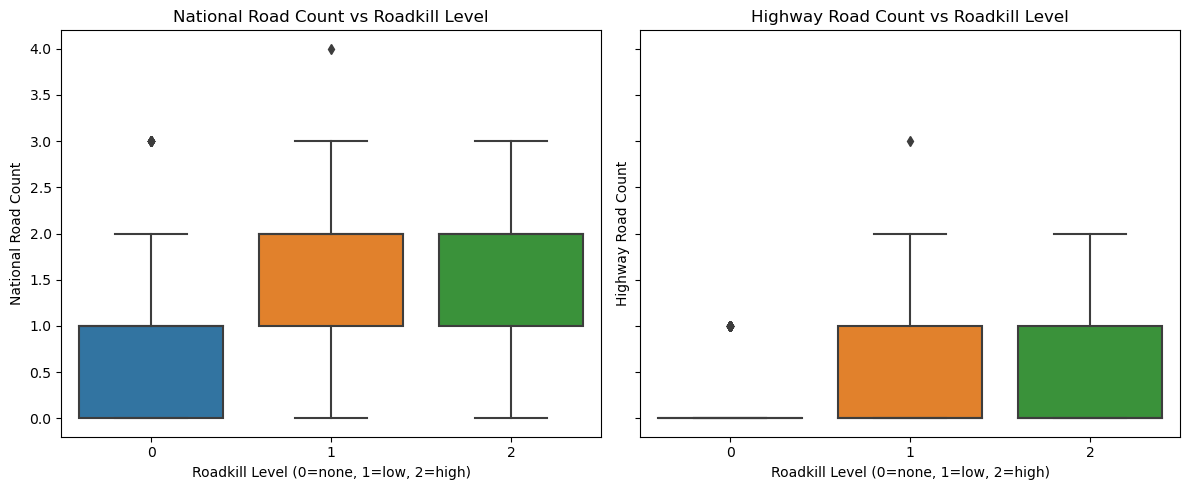

In [320]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# National road count
sns.boxplot(data=data, x='roadkill_level', y='national_road_count', ax=ax[0])
ax[0].set_title('National Road Count vs Roadkill Level')
ax[0].set_xlabel('Roadkill Level (0=none, 1=low, 2=high)')
ax[0].set_ylabel('National Road Count')

# Highway road count
sns.boxplot(data=data, x='roadkill_level', y='highway_road_count', ax=ax[1])
ax[1].set_title('Highway Road Count vs Roadkill Level')
ax[1].set_xlabel('Roadkill Level (0=none, 1=low, 2=high)')
ax[1].set_ylabel('Highway Road Count')

plt.tight_layout()
plt.show()


- **National Road Count:**  
  Grids with higher roadkill levels (1–2) tend to have slightly more national roads than grids with no incidents.  
  This indicates that national roads may contribute more strongly to roadkill risk compared to local roads.  

- **Highway Road Count:**  
  Highways are sparse across the region, and their counts remain close to zero in all risk levels.  
  While present in only a few grids, highways do not show a strong differentiating effect on roadkill risk in this dataset.  


## 2. Feature Engineering

Since actual speed limit data is not available,  
we create a proxy variable (`speed_proxy`) based on road types.  

- Highways = fastest roads → weight 3  
- National/provincial roads = medium speed → weight 2  
- Only ordinary roads present = slowest → weight 1  

This `speed_proxy` approximates the relative traffic speed environment  
of each grid cell, serving as a proxy for speed limits.


In [321]:
# Create speed_proxy as weighted score
data['speed_proxy'] = (
    3 * data['highway_road_count'] +
    2 * data['national_road_count']
)

# If both counts are zero → only ordinary road present
data.loc[(data['highway_road_count']==0) & (data['national_road_count']==0), 'speed_proxy'] = 1


In [322]:
data

,grid_id,roadkill_count,national_highway_rk,white_rk,corridor_count,min_dist_to_corridor,is_hongcheon,wild_boar_count,roe_deer_count,white_road_grade,national_road_count,highway_road_count,roadkill_level,speed_proxy
0,grid_25,0,0,0,0,0.000000,0,1.540276,0.000000,1,1,0,0,2
1,grid_26,0,0,0,0,0.000000,0,1.540276,0.000000,0,0,0,0,1
2,grid_55,0,0,0,0,0.000000,0,1.540276,0.000000,1,0,0,0,1
3,grid_56,0,0,0,0,0.000000,0,1.540276,0.000000,1,0,0,0,1
4,grid_57,0,0,0,0,0.000000,0,1.540276,0.000000,2,3,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,grid_1413,0,0,0,0,0.000000,0,0.000000,7.052573,2,1,0,0,2
780,grid_1414,2,0,2,0,8780.044607,0,0.000000,7.052573,2,1,0,1,2
781,grid_1443,0,0,0,0,0.000000,0,0.000000,7.052573,3,1,0,0,2
782,grid_1444,0,0,0,0,0.000000,0,0.000000,7.052573,1,0,0,0,1


### Distribution of the New Variable: **speed_proxy**


In [323]:
data['speed_proxy'].value_counts().sort_index()

speed_proxy
1     234
2     276
3      16
4     134
5      42
6      27
7      42
8       4
9       7
10      2
Name: count, dtype: int64

Most grids have a low speed_proxy (1–2),
indicating areas with no highways or only national/provincial roads.
A smaller number of grids fall in the mid-range (4–7),
while only a handful reach very high values (8–10),
reflecting strong highway dominance.

### Relationship between `speed_proxy` and `roadkill_level`

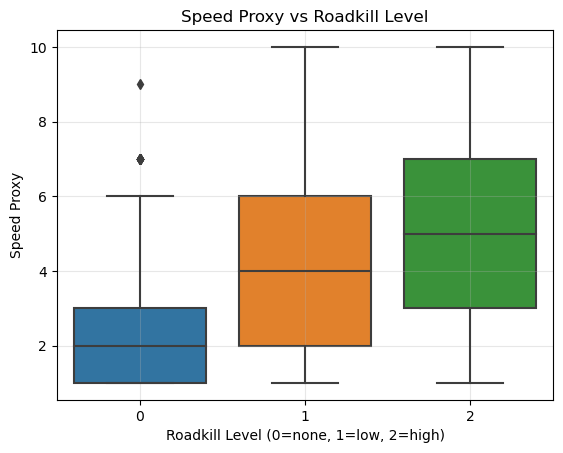

In [324]:
sns.boxplot(data=data, x='roadkill_level', y='speed_proxy')
plt.title('Speed Proxy vs Roadkill Level')
plt.xlabel('Roadkill Level (0=none, 1=low, 2=high)')
plt.ylabel('Speed Proxy')
plt.grid(alpha=0.3)
plt.show()


The boxplot shows a clear upward trend:  
- **Level 0 (no incidents):** Concentrated at low `speed_proxy` values (mostly 1–2).  
- **Level 1 (low incidents):** Wider spread, with many grids in the mid-range (3–6).  
- **Level 2 (high incidents):** Higher median and broader distribution, reaching the maximum values.  

This suggests that **faster road environments (proxied by more highways and national roads)**  
are associated with a greater likelihood of roadkill incidents.

## 3. Modeling 

### Imports for modeling

In [325]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
import keras

In [326]:
non_hongcheon = data[data['is_hongcheon'] == 0]
hongcheon = data[data['is_hongcheon'] == 1]
drop_columns = [
    'grid_id', 'roadkill_count', 'national_road_count', 'highway_road_count', 'roadkill_level','is_hongcheon'
]
X_train_full = non_hongcheon.drop(columns = drop_columns)
X_test = hongcheon.drop(columns = drop_columns)
y_train_full = non_hongcheon['roadkill_level']
y_test = hongcheon['roadkill_level']

In [327]:
X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape

((675, 8), (109, 8), (675,), (109,))

In [328]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size = 0.2, stratify = y_train_full
)

In [329]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((540, 8), (109, 8), (540,), (109,))

### Feature Scaling
We applied **standardization (StandardScaler)** to continuous features  
(`min_dist_to_corridor`, `wild_boar_count`, `roe_deer_count`)  
to ensure all variables are on a comparable scale.  

Scaling was fit on the **training set only**, and the same transformation  
was applied to validation and test sets to avoid data leakage.


In [330]:
scale_cols = ['min_dist_to_corridor', 'wild_boar_count', 'roe_deer_count']

scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_val[scale_cols] = scaler.transform(X_val[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [331]:
X_train.columns

Index(['national_highway_rk', 'white_rk', 'corridor_count',
       'min_dist_to_corridor', 'wild_boar_count', 'roe_deer_count',
       'white_road_grade', 'speed_proxy'],
      dtype='object')

### SGD Modeling

In [332]:
sgd = SGDClassifier(loss = 'log_loss')
sgd.fit(X = X_train, y = y_train)

# prediction
train_pred = sgd.predict(X_train)
val_pred = sgd.predict(X_val)
full_pred = sgd.fit(X_train_full, y_train_full).predict(X_train_full)
test_pred = sgd.predict(X_test)

# calculate accuracy 
acc_train = accuracy_score(y_train, train_pred)
acc_val = accuracy_score(y_val, val_pred)
f1_val = f1_score(y_val, val_pred, average = 'macro')
acc_full = accuracy_score(y_train_full, full_pred)
acc_test = accuracy_score(y_test, test_pred)
f1_test = f1_score(y_test, test_pred, average = 'macro')

# Confusion matrix calculation

cm_train = confusion_matrix(y_train, train_pred)
cm_val = confusion_matrix(y_val, val_pred)
cm_full = confusion_matrix(y_train_full, full_pred)
cm_test = confusion_matrix(y_test, test_pred)

# Report for Train
print("Train:", acc_train)
print("\nConfusion Matrix for train:\n", cm_train)
# print("\nClassification Report for train:\n", classification_report(y_train, train_pred))


# Report for Validation
print("\nValidation:", acc_val)
print("\nConfusion Matrix for validation:\n", cm_val)
# print("\nClassification Report for validation:\n", classification_report(y_val, val_pred))

# Report for Train+Validation ==> non hongcheon 

print("\nTrain+Val:", acc_full)
print("\nConfusion Matrix for Train+Validation ==> non_hongcheon:\n", cm_full)
# print("\nClassification Report for validation:\n", classification_report(y_train_full, full_pred))


# Report for Test ==> Hongcheon
print("\nTest:", acc_test)
print("\nConfusion Matrix for Test ==> hongcheon:\n", cm_test)
# print("\nClassification Report for validation:\n", classification_report(y_test, test_pred))




Train: 0.9833333333333333

Confusion Matrix for train:
 [[426   0   0]
 [  5  81   3]
 [  0   1  24]]

Validation: 0.9925925925925926

Confusion Matrix for validation:
 [[106   0   0]
 [  1  21   0]
 [  0   0   7]]

Train+Val: 0.8251851851851851

Confusion Matrix for Train+Validation ==> non_hongcheon:
 [[525   0   7]
 [  0   0 111]
 [  0   0  32]]

Test: 0.3944954128440367

Confusion Matrix for Test ==> hongcheon:
 [[35 50  0]
 [ 2  5 14]
 [ 0  0  3]]


In [333]:
results = []
results.append({
    'Model': "SGD",
    'Train Acc': acc_train,
    'Val Acc': acc_val,
    'Macro-F1 for Val':f1_val,
    'Train + Val Acc': acc_full,
})

In [334]:
results

[{'Model': 'SGD',
  'Train Acc': 0.9833333333333333,
  'Val Acc': 0.9925925925925926,
  'Macro-F1 for Val': 0.9906831167885869,
  'Train + Val Acc': 0.8251851851851851}]

# Gradient Boosting Model

In [335]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

# predict data
train_pred = gb_clf.predict(X_train)
val_pred = gb_clf.predict(X_val)
full_pred = gb_clf.fit(X_train_full, y_train_full).predict(X_train_full)


# calculate accuracy 
acc_train = accuracy_score(y_train, train_pred)
acc_val = accuracy_score(y_val, val_pred)
f1_val = f1_score(y_val, val_pred, average = 'macro')
acc_full = accuracy_score(y_train_full, full_pred)


# Confusion matrix calculation

cm_train = confusion_matrix(y_train, train_pred)
cm_val = confusion_matrix(y_val, val_pred)
cm_full = confusion_matrix(y_train_full, full_pred)


# Report for Train
print("Train:", acc_train)
print("\nConfusion Matrix for train:\n", cm_train)
# print("\nClassification Report for train:\n", classification_report(y_train, train_pred))


# Report for Validation
print("Validation:", acc_val)
print("\nConfusion Matrix for validation:\n", cm_val)
# print("\nClassification Report for validation:\n", classification_report(y_val, val_pred))

# Report for Train+Validation ==> non hongcheon 

print("Train+Val:", acc_full)
print("\nConfusion Matrix for Train+Validation ==> non_hongcheon:\n", cm_full)
# print("\nClassification Report for validation:\n", classification_report(y_train_full, full_pred))




Train: 1.0

Confusion Matrix for train:
 [[426   0   0]
 [  0  89   0]
 [  0   0  25]]
Validation: 0.9925925925925926

Confusion Matrix for validation:
 [[106   0   0]
 [  0  22   0]
 [  0   1   6]]
Train+Val: 1.0

Confusion Matrix for Train+Validation ==> non_hongcheon:
 [[532   0   0]
 [  0 111   0]
 [  0   0  32]]


In [336]:
results.append({
    'Model': "Gradient Boosting",
    'Train Acc': acc_train,
    'Val Acc': acc_val,
    'Macro-F1 for Val':f1_val,
    'Train + Val Acc': acc_full
})

In [337]:
results

[{'Model': 'SGD',
  'Train Acc': 0.9833333333333333,
  'Val Acc': 0.9925925925925926,
  'Macro-F1 for Val': 0.9906831167885869,
  'Train + Val Acc': 0.8251851851851851},
 {'Model': 'Gradient Boosting',
  'Train Acc': 1.0,
  'Val Acc': 0.9925925925925926,
  'Macro-F1 for Val': 0.9669515669515669,
  'Train + Val Acc': 1.0}]

### Neural Network Model (ANN)

We build a feed-forward neural network (Artificial Neural Network, ANN)  
with two hidden layers to classify roadkill risk levels (0 = none, 1 = low, 2 = high).


In [338]:
# Define a sequential neural network model
model = keras.Sequential([
    
     # Input layer: 8 explanatory variables
    keras.layers.Input(shape=(8,)),
    
    # First hidden layer with 16 neurons and ReLU activation
    keras.layers.Dense(16, activation='relu'),
    
    # Second hidden layer with 8 neurons and ReLU activation
    keras.layers.Dense(8, activation='relu'),    
    
     # Output layer with 3 neurons (for 3 classes) and softmax activation
    keras.layers.Dense(3, activation='softmax')  
])


In [339]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 307 (1.20 KB)

 Trainable params: 307 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

In [340]:

# model compile
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=[keras.metrics.sparse_categorical_accuracy])
# Train the neural network model
model.fit(x=X_train, y=y_train, epochs=1_000, verbose=0)

In [341]:
# Prediction
train_pred = model.predict(X_train).argmax(axis = 1)
val_pred = model.predict(X_val).argmax(axis = 1)

# Accuracy and F1
acc_train = accuracy_score(y_train, train_pred)
f1_val = f1_score(y_val, val_pred, average = 'macro')

# Confusion matrix Calculation
cm_train = confusion_matrix(y_train, train_pred)
cm_val = confusion_matrix(y_val,val_pred)

# Report for Train
print("Train:", acc_train)
print("\nConfusion Matrix for train:\n", cm_train)

# Report for Val
print("Train:", acc_val)
print("\nConfusion Matrix for train:\n", cm_val)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
Train: 1.0

Confusion Matrix for train:
 [[426   0   0]
 [  0  89   0]
 [  0   0  25]]
Train: 0.9925925925925926

Confusion Matrix for train:
 [[106   0   0]
 [  0  22   0]
 [  0   1   6]]


#### Train final ANN model on full non-Hongcheon dataset

In [342]:
# Clone the ANN structure (fresh weights)
model_full = keras.models.clone_model(model)

# Compile with the same optimizer/loss/metrics
model_full.compile(
    optimizer=keras.optimizers.SGD(),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=[keras.metrics.sparse_categorical_accuracy]
)

# Fit model on full non-Hongcheon (train + val)
model_full.fit(X_train_full, y_train_full, epochs=1000, verbose=0)

In [343]:
# Predictions
full_pred = model_full.predict(X_train_full).argmax(axis = 1)
test_pred = model_full.predict(X_test).argmax(axis = 1)

# Accuracy and F1
acc_full = accuracy_score(y_train_full, full_pred)
f1_test = f1_score(y_test, test_pred, average = 'macro')

# Confusion matrices
cm_full = confusion_matrix(y_train_full, full_pred)
cm_test = confusion_matrix(y_test, test_pred)

# Report for Train+Validation ==> non hongcheon 
print("Train+Val:", acc_full)
print("\nConfusion Matrix for Train+Validation ==> non_hongcheon:\n", cm_full)
# print("\nClassification Report for validation:\n", classification_report(y_train_full, full_pred))

# Report for Test ==> Hongcheon
print("Test:", acc_test)
print("\nConfusion Matrix for Test ==> hongcheon:\n", cm_test)
# print("\nClassification Report for validation:\n", classification_report(y_test, test_pred))



22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
Train+Val: 0.7881481481481482

Confusion Matrix for Train+Validation ==> non_hongcheon:
 [[532   0   0]
 [111   0   0]
 [ 32   0   0]]
Test: 0.3944954128440367

Confusion Matrix for Test ==> hongcheon:
 [[ 0 85  0]
 [18  3  0]
 [ 3  0  0]]


In [344]:
# Append ANN results to results list 
results.append({
    'Model': "ANN SGD",
    'Train Acc': acc_train,
    'Val Acc': acc_val,
    'Train + Val Acc': acc_full,
    'Macro-F1 for Val':f1_val,
})

### Convert results to DataFrame and save to make a dashboard

In [345]:
df_results = pd.DataFrame(results)
print(df_results)
# Save to CSV (for Tableau Dashboard)
df_results.to_csv("results_summary.csv", index=False)
print("Results saved to results_summary.csv")

               Model  Train Acc   Val Acc  Macro-F1 for Val  Train + Val Acc
0                SGD   0.983333  0.992593          0.990683         0.825185
1  Gradient Boosting   1.000000  0.992593          0.966952         1.000000
2            ANN SGD   1.000000  0.992593          0.966952         0.788148
Results saved to results_summary.csv


We conclude that Gradient Boosting is the best model.

## Final Model Evaluation: Gradient Boosting

Gradient Boosting was selected as the best-performing model based on non-Hongcheon training and validation results.  
The model was retrained on the full non-Hongcheon dataset and then applied to the Hongcheon test set.

### Performance on Hongcheon (Test Set)


In [346]:
# Gradient Boosting Model
gb_clf_final = GradientBoostingClassifier()

# Train on full non-Hongcheon data
gb_clf_final.fit(X_train_full, y_train_full)

# Predictions
full_pred = gb_clf_final.predict(X_train_full)   # Train+Val (non-Hongcheon)
test_pred = gb_clf_final.predict(X_test)         # Hongcheon test set

# Train+Val metrics
acc_full = accuracy_score(y_train_full, full_pred)
cm_full = confusion_matrix(y_train_full, full_pred)

# Test (Hongcheon) metrics
acc_test = accuracy_score(y_test, test_pred)
f1_test = f1_score(y_test, test_pred, average='macro')
cm_test = confusion_matrix(y_test, test_pred)


print("Train+Val Accuracy (non-Hongcheon):", acc_full)
print("\nConfusion Matrix (non-Hongcheon):\n", cm_full)

print("\nTest Accuracy (Hongcheon):", acc_test)
print("Macro-F1 (Hongcheon):", f1_test)
print("\nConfusion Matrix (Hongcheon):\n", cm_test)

# Optional: Detailed classification report
print("\nClassification Report (Hongcheon):\n", classification_report(y_test, test_pred))


Train+Val Accuracy (non-Hongcheon): 1.0

Confusion Matrix (non-Hongcheon):
 [[532   0   0]
 [  0 111   0]
 [  0   0  32]]

Test Accuracy (Hongcheon): 0.7889908256880734
Macro-F1 (Hongcheon): 0.46027633851468047

Confusion Matrix (Hongcheon):
 [[85  0  0]
 [21  0  0]
 [ 2  0  1]]

Classification Report (Hongcheon):
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        85
           1       0.00      0.00      0.00        21
           2       1.00      0.33      0.50         3

    accuracy                           0.79       109
   macro avg       0.60      0.44      0.46       109
weighted avg       0.64      0.79      0.70       109



/Users/yeji_kim/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yeji_kim/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yeji_kim/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 📋 Predicted High-Risk Grid IDs

The Gradient Boosting model identified the following grid(s) as **level 2 (high risk)** in Hongcheon:



In [347]:
print('Predicted High-Risk Grids:')
print(hongcheon.loc[test_pred == 2, 'grid_id'].to_list())

Predicted High-Risk Grids:
['grid_364']
